In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
business = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [3]:
business.shape

(192609, 14)

In [4]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [5]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [6]:
drop_cols = ['address', 'attributes', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code']
business.drop(drop_cols, axis=1, inplace=True)

In [7]:
business.head()

,business_id,categories,city,review_count,stars,state
0,1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,5,3.0,AZ
1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,128,2.5,ON
2,gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,170,4.0,NC
3,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,3,5.0,AZ
4,HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,4,4.0,NC


In [8]:
print(business.categories[0])

Golf, Active Life


In [9]:
type(business.categories[0])

str

In [10]:
business.categories[0][0]

'G'

In [11]:
business['categories'] = business['categories'].str.split(', ?')

In [12]:
business['categories'].head()

0                                  [Golf, Active Life]
1    [Specialty Food, Restaurants, Dim Sum, Importe...
2                  [Sushi Bars, Restaurants, Japanese]
3                      [Insurance, Financial Services]
4    [Plumbing, Shopping, Local Services, Home Serv...
Name: categories, dtype: object

In [13]:
category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

In [14]:
category_counts

Restaurants                  59371
Shopping                     31878
Food                         29989
Home Services                19729
Beauty & Spas                19370
Health & Medical             17171
Local Services               13932
Automotive                   13203
Nightlife                    13095
Bars                         11341
Event Planning & Services    10371
Active Life                   9521
Fashion                       7798
Sandwiches                    7332
Coffee & Tea                  7321
Fast Food                     7257
American (Traditional)        7107
Hair Salons                   6955
Pizza                         6804
Home & Garden                 6489
dtype: int64

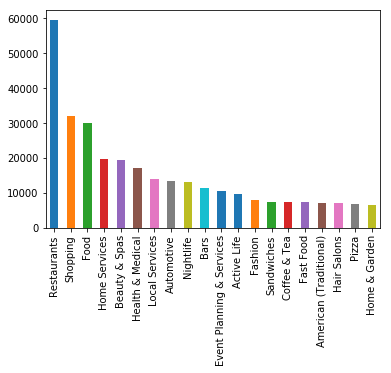

In [15]:
category_counts.plot(kind='bar')

In [16]:
pd.isna(business['categories']).sum()

482

In [17]:
business.loc[pd.isna(business['categories'])].head()

,business_id,categories,city,review_count,stars,state
265,xOR85RicYj642O3_iJ7hgg,None,Scottsdale,3,3.5,AZ
597,tWvep1usNNI3NYkoRbSb7g,None,Airdrie,3,1.0,AB
1020,llG2YxnevtFhW7LVa4QJXQ,None,Pittsburgh,5,2.0,PA
1332,zi2CV7isWyGRxVXJxdDQXg,None,Charlotte,3,1.5,NC
1770,oyPZZX2fQYpSBHk25tL26A,None,Etobicoke,6,4.5,ON


In [18]:
business = business.loc[~pd.isna(business['categories'])]

In [19]:
business.shape

(192127, 6)

In [20]:
business = business.loc[business['categories'].apply(lambda x: 'Restaurants' in x), :]

In [21]:
business.shape

(59371, 6)

In [22]:
restaurant_category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

In [23]:
restaurant_category_counts.head()

Restaurants    59371
Food           14800
Nightlife       8562
Bars            8182
Sandwiches      7332
dtype: int64

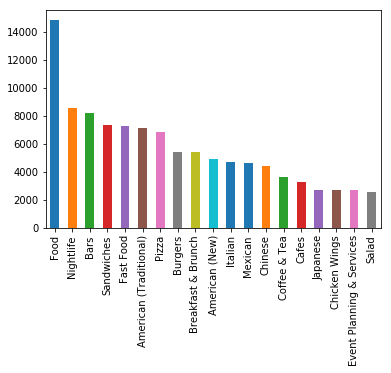

In [24]:
restaurant_category_counts[1:].plot(kind='bar')

In [25]:
italian_pizza = business.loc[business['categories'].apply(lambda x: ('Pizza' in x) | ('Italian' in x)), :]

In [26]:
italian_pizza.head()

,business_id,categories,city,review_count,stars,state
13,fweCYi8FmbJXHCqLnwuk8w,"[Italian, Restaurants, Pizza, Chicken Wings]",Mentor-on-the-Lake,16,4.0,OH
17,PZ-LZzSlhSe9utkQYU8pFg,"[Restaurants, Italian]",Las Vegas,40,4.0,NV
35,BvYU3jvGd0TJ7IyZdfiN2Q,"[Sandwiches, Italian, American (Traditional), ...",Charlotte,16,3.5,NC
80,PkDghu4aan2_wxrhXjTEgg,"[Nightlife, Italian, Restaurants, Japanese, Lo...",Calgary,16,3.5,AB
83,RFbMVekR8lU9tPJ8sWrwHg,"[Italian, Restaurants]",Toronto,18,4.0,ON


In [27]:
italian_pizza.shape

(9224, 6)

In [28]:
italian_pizza.to_csv('business_list.csv', columns=['business_id', 'review_count', 'stars', 'state'], index=False)